In [115]:
import matplotlib.pyplot as plt
import os
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib
from zlib import crc32
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Get the Data

### Download data

--- Downloads data from the url, extracts csv file and saves in our local directory :-

In [2]:
'''download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
#download_path = os.path.join('datasets', 'housing')
HOUSING_URL = download_root + "datasets/housing/housing.tgz"

def get_data(housing_url = HOUSING_URL):
    path = os.path.join('dataset')
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, "housing.tgz")   
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()'''

'download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"\n#download_path = os.path.join(\'datasets\', \'housing\')\nHOUSING_URL = download_root + "datasets/housing/housing.tgz"\n\ndef get_data(housing_url = HOUSING_URL):\n    path = os.path.join(\'dataset\')\n    if not os.path.isdir(path):\n        os.makedirs(path)\n    tgz_path = os.path.join(path, "housing.tgz")   \n    urllib.request.urlretrieve(housing_url, tgz_path)\n    housing_tgz = tarfile.open(tgz_path)\n    housing_tgz.extractall(path=path)\n    housing_tgz.close()'

In [3]:
#get_data()

--- Returns pandas dataframe object containing all the data :-

In [4]:
PATH = os.path.join('dataset')
def load_data(path = PATH):
    return pd.read_csv(os.path.join(path, 'housing.csv'))

### Take a quick look at the data

In [5]:
df_housing = load_data()
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df_housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

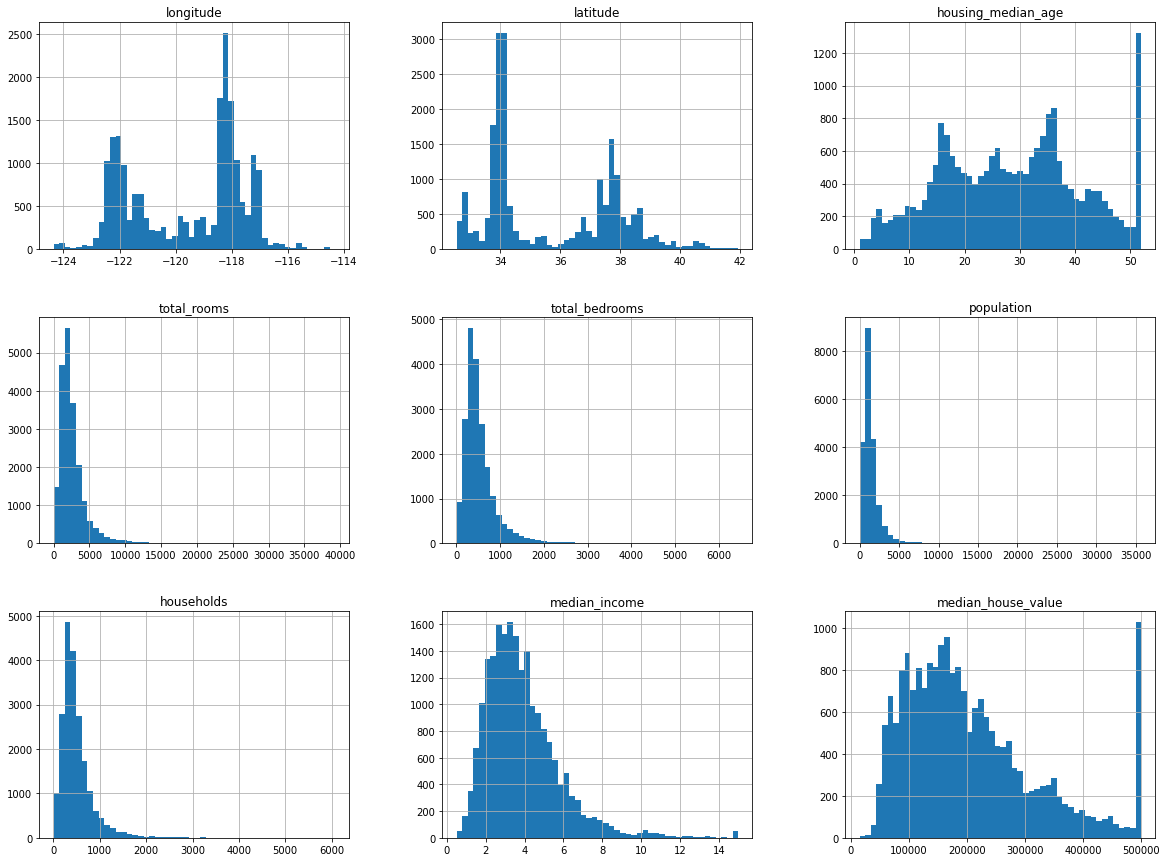

In [9]:
df_housing.hist(bins=50,figsize=(20,15))

<AxesSubplot:>

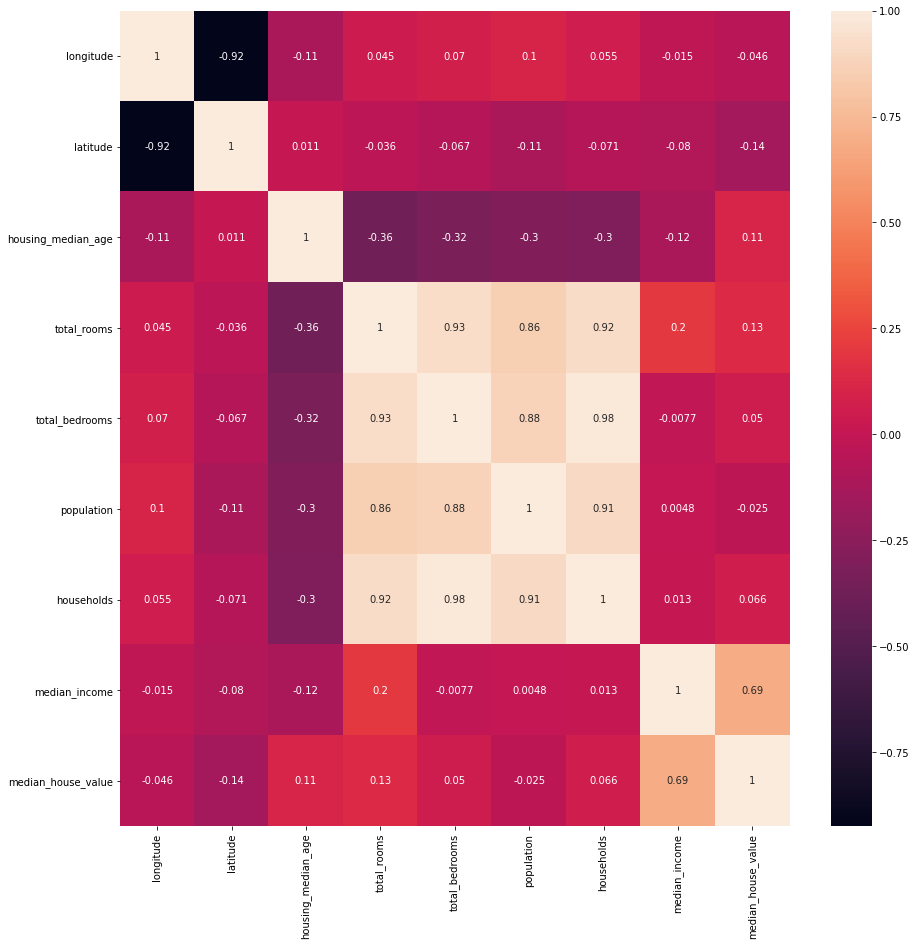

In [10]:
cor = df_housing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

From the heatmap, we can see that **housing median value is highly correlated with median_income**. So, test set should be created such that it is the representative of whole population (districts from all income classes should be included). 

### Create a test set

Points to note while creating test set :-
- 20% of the whole is enough for test. (If dataset is very large, less than 20% is good enough)
- Use random seed to ensure that same data is put into test set. To avoid the case that training data from previous execution of code comes in test set during current execution. (Give unique identifier to each row)
- To avoid risk of Sampling bias, do stratified sampling. (To ensure that sample is representative of overall population)

In [11]:
#To make output of this notebook same every time it runs
np.random.seed(42)

def split_test_train(data, ratio):
    shuffle_data = np.random.permutation(len(data))
    test_size = int(len(data)*ratio)
    test_data = shuffle_data[:test_size]
    train_data = shuffle_data[test_size:]
    
    return data.iloc[train_data], data.iloc[test_data]

In [12]:
train_data, test_data = split_test_train(df_housing, 0.2)
print(len(train_data))
len(test_data)

16512


4128

In [13]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [14]:
def split_test_train_by_ID(data, test_ratio, id_col):
    ids = data[id_col]
    test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    print(test_set)
    return data.loc[~test_set], data.loc[test_set]

In [15]:
df_housing = df_housing.reset_index()
train_data, test_data = split_test_train_by_ID(df_housing, 0.2, 'index')

0        False
1        False
2         True
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: index, Length: 20640, dtype: bool


In [16]:
print(len(train_data))
print(len(test_data))
test_data.head()

16512
4128


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [17]:
df_housing['id'] = df_housing['longitude']*1000 + df_housing['latitude']
train_data, test_data = split_test_train_by_ID(df_housing, 0.2, 'id')
df_housing['id']

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: id, Length: 20640, dtype: bool


0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
           ...    
20635   -121050.52
20636   -121170.51
20637   -121180.57
20638   -121280.57
20639   -121200.63
Name: id, Length: 20640, dtype: float64

In [18]:
train_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [19]:
test_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [58]:
df_housing['income_cat'] = pd.cut(df_housing["median_income"],
                   bins = [0., 1.5 , 3.0 , 4.5, 6., np.inf],
                   labels=[1,2,3,4,5])


<AxesSubplot:>

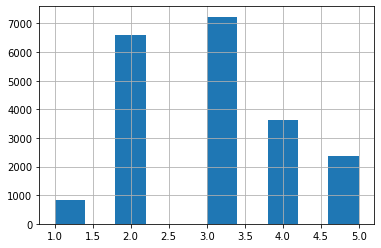

In [59]:
df_housing['income_cat'].hist()


-- Stratified sampling to avoid Sampling bias :-

In [60]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing['income_cat']):
    strat_train = df_housing.loc[train_index]
    strat_test = df_housing.loc[test_index]

In [61]:
strat_train.drop(['id','index'], axis=1, inplace=True)
strat_test['income_cat'].value_counts() / len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
df_housing['income_cat'].value_counts() / len(df_housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df_housing),
    "Stratified": income_cat_proportions(strat_test),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [62]:
for data in (strat_train, strat_test):
    data.drop('income_cat', axis=1, inplace=True)

## Discover and visualize the data to gain insights

### Visualizing geographical data

In [63]:
housing = strat_train.copy()
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

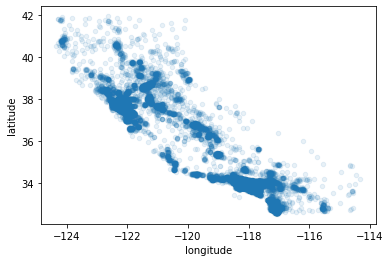

In [47]:
#Option alpha helps to view highly dense areas
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

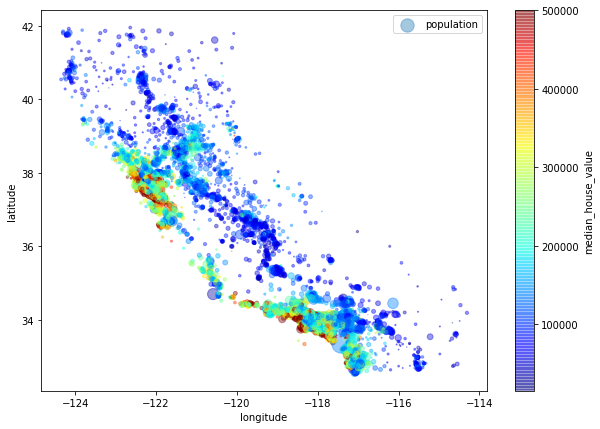

In [48]:
##Radius of each circle shows district population (option s). color represents price (option cmap),
#ranges from blue(lowest) to red(highest)

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

-- Prices are high near coastal area and where population density is high.

### Looking for correlations

In [30]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
index                 0.067723
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
id                   -0.047632
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot

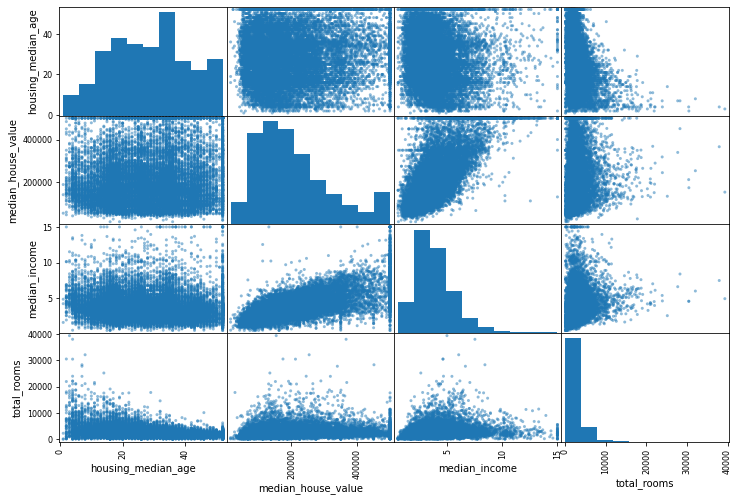

In [49]:
attributes = ['housing_median_age','median_house_value', 'median_income', 'total_rooms']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

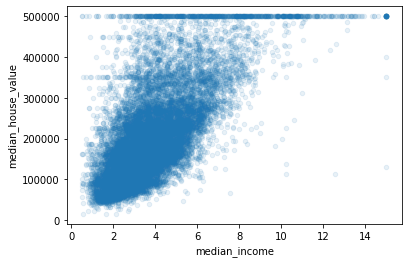

In [53]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.1)

In [64]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [65]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_house'] = housing['total_bedrooms']/housing['households']
housing['population_per_house'] = housing['population']/housing['households']

In [66]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687160
rooms_per_house         0.146285
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
population_per_house   -0.021985
population             -0.026920
bedrooms_per_house     -0.043343
longitude              -0.047432
latitude               -0.142724
Name: median_house_value, dtype: float64

### Data Cleaning 

In [67]:
housing = strat_train.drop('median_house_value', axis=1)
housing_labels = strat_train['median_house_value'].copy()

In [68]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [71]:
X = imputer.transform(housing_num)
# The result is a plain numpy array containing transformed features. Put it back into a Pandas dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [77]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


#### Handling text and categorical values

**Most machine learning algorithms prefer to work with numbers, so convert categories into numbers.**

In [78]:
ordinal_encoder = OrdinalEncoder()
housing_encoded = ordinal_encoder.fit_transform(housing_cat)

In [79]:
housing_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

**The problem with this representation is that ML algos will think that two nearby values are similar than distant**. So one-hot encoding is the solution./


In [83]:
cat_encoder = OneHotEncoder()
cat_oneencoder = cat_encoder.fit_transform(housing_cat)

cat_oneencoder

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Custom transformer for adding extra attributes->

#### Custome Transformers

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [86]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [88]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [89]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [97]:
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])

housing_prep = full_pipeline.fit_transform(housing)

In [98]:
housing_prep

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Training the model

In [101]:
linear_model = LinearRegression()
linear_model.fit(housing_prep, housing_labels)

LinearRegression()

In [103]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_prep_data = full_pipeline.transform(some_data)

print(linear_model.predict(some_prep_data))

[210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [105]:
predictions = linear_model.predict(some_prep_data)

mse = mean_squared_error(some_labels, predictions)

rmse = np.sqrt(mse)

rmse

46578.63831786745

- The error is too huge. This means that the model is underfitted. When this happens that means, either features don't provide enough information or the model is not strong.

In [107]:
tree_model = DecisionTreeRegressor()
tree_model.fit(housing_prep, housing_labels)

DecisionTreeRegressor()

In [108]:
predictions = tree_model.predict(housing_prep)
mse = mean_squared_error(housing_labels, predictions)
print(np.sqrt(mse))

0.0


In [110]:
scores = cross_val_score(tree_model, housing_prep, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [111]:
print(tree_rmse_scores)
print(tree_rmse_scores.mean())
print(tree_rmse_scores.std())

[69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
70666.74616904806
2928.322738055112


In [113]:
forest_model = RandomForestRegressor()
forest_model.fit(housing_prep, housing_labels)

RandomForestRegressor()

In [114]:
predictions = forest_model.predict(housing_prep)
mse = mean_squared_error(housing_labels, predictions)
scores = np.sqrt(mse)
print(scores.mean())

18680.294240259147


### Fine tune the model

In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)